<a href="https://colab.research.google.com/github/hugomilesi/Predictions-for-Brazillian-Car-Prices-2023-/blob/main/brazil_car_price_insights_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
!pip install category_encoders

In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set(style="whitegrid")

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
df = pd.read_csv('/content/drive/MyDrive/Machine learning/Brazil_car_prices/train_df.csv')
df = df.iloc[:, 1:]

In [84]:
df.tail()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
249893,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2009,22894.0,14
249894,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2008,22270.0,15
249895,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2007,21663.0,16
249896,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2006,21073.0,17
249897,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2005,18264.0,18


# Initial Preprocessing

In [85]:
df.tail()

,year_of_reference,month_of_reference,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
249893,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2009,22894.0,14
249894,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2008,22270.0,15
249895,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2007,21663.0,16
249896,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2006,21073.0,17
249897,2022,December,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2005,18264.0,18


In [86]:
print(f"fipe_cars shape: {df.shape}")

fipe_cars shape: (249898, 10)


In [87]:
# df = df.drop(columns = ['fipe_code', 'authentication'])
# df['age_years'] = df['year_of_reference'] - df['year_model']
# df['age_years'] = df['age_years'].replace(-1, 0)
# df.dtypes

In [88]:
df["year_of_reference"] = df['year_of_reference'].astype(str)
#df["year_model"] = df['year_model'].astype(str)

In [89]:
df.dtypes

year_of_reference      object
month_of_reference     object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size           float64
year_model              int64
avg_price_brl         float64
age_years               int64
dtype: object

In [90]:
df.describe()

,engine_size,year_model,avg_price_brl,age_years
count,249898.000000,249898.000000,249898.000000,249898.000000
mean,2.115486,2007.408034,52308.187577,15.591966
std,0.901288,8.976596,43175.475346,8.976596
min,0.700000,1985.000000,1831.000000,0.000000
25%,1.600000,2000.000000,19175.250000,8.000000
50%,1.900000,2008.000000,38585.000000,15.000000
75%,2.500000,2015.000000,73451.750000,23.000000
max,6.500000,2023.000000,190454.000000,38.000000


In [91]:
numerical_columns = df.select_dtypes(exclude = "object").columns

# "model" column has more than 6k unique categories, to reduce processing time i won't be using them fully
categorical_columns = ['age_years', 'month_of_reference', 'brand', 'fuel', 'gear']

 # EDA


In [92]:
def show_dist(df, cols, num_rows = 3, num_cols = 2, figsize = (16, 8)):

    # Create a figure and axis for the subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize= figsize)
    fig.suptitle("Distribution of Numerical Features", fontsize=20)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Loop through the numerical columns and create distribution plots
    for i, column in enumerate(cols):
        if i < len(cols): # check index bounds
            sns.histplot(data=df, x=column, kde=True, ax=axes[i], bins = 35)
            axes[i].set_title(f'Distribution of {column}')
            axes[i].set_xlabel('')
            axes[i].set_ylabel('')
        else:
            axes[i].axis('off')

    # Remove any empty subplots
    for i in range(len(cols), num_rows * num_cols):
        fig.delaxes(axes[i])

    # Adjust subplot layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    # Show the plots
    plt.show()


## Data Distribution

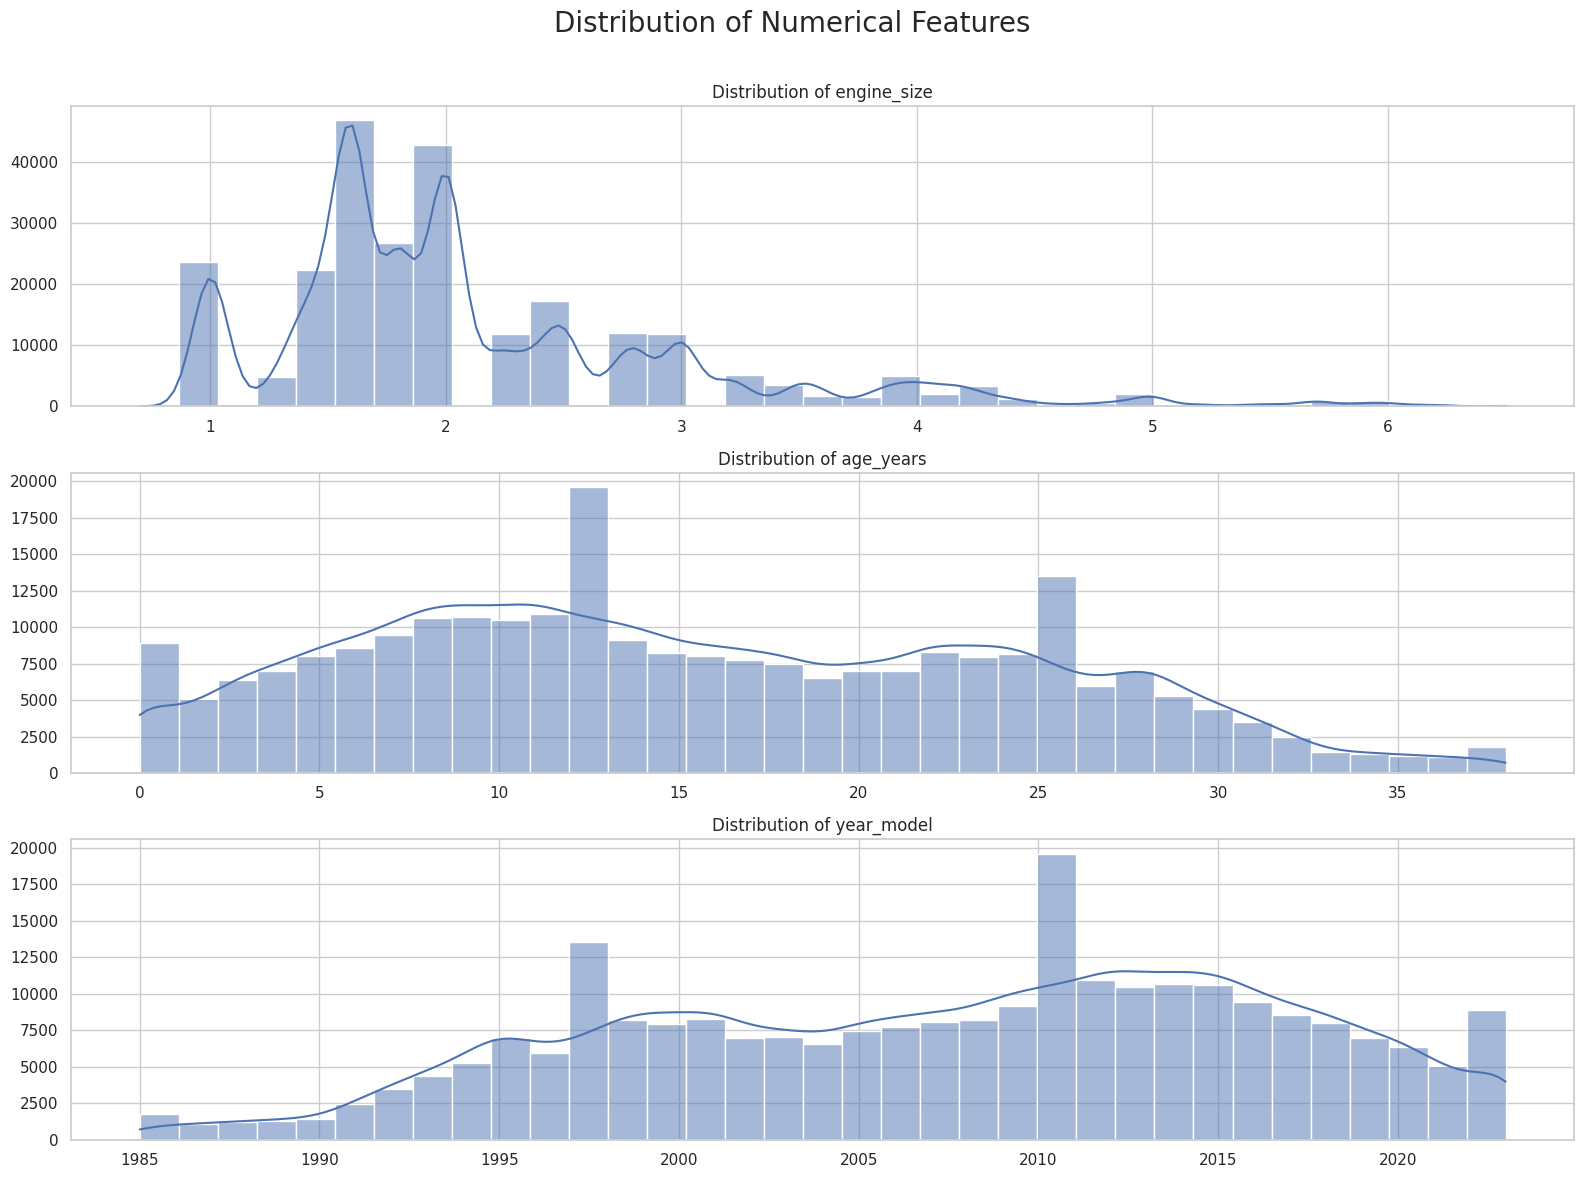

In [93]:
cols = ['engine_size', 'age_years', 'year_model']

show_dist(df, cols, num_rows = 3, num_cols = 1,figsize = (16, 12))

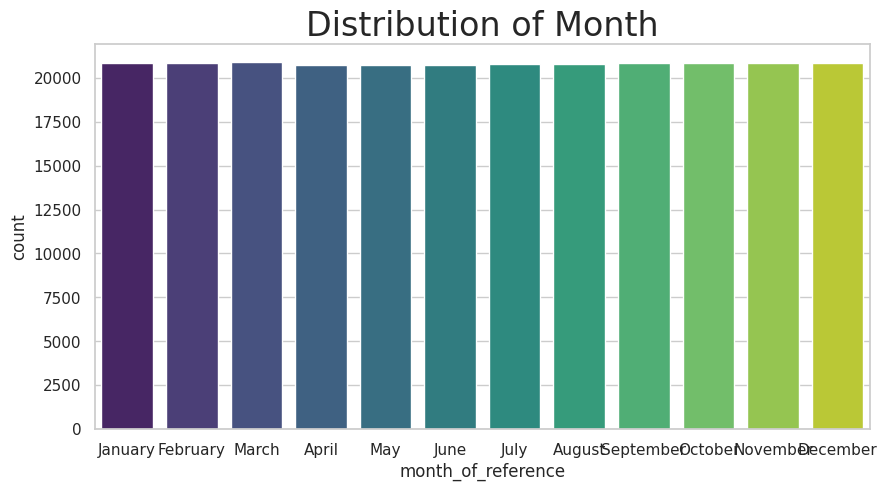

In [94]:
plt.figure(figsize = (10, 5))
sns.countplot(x = df["month_of_reference"], palette = 'viridis')
plt.title("Distribution of Month", fontsize = 24)
plt.show()

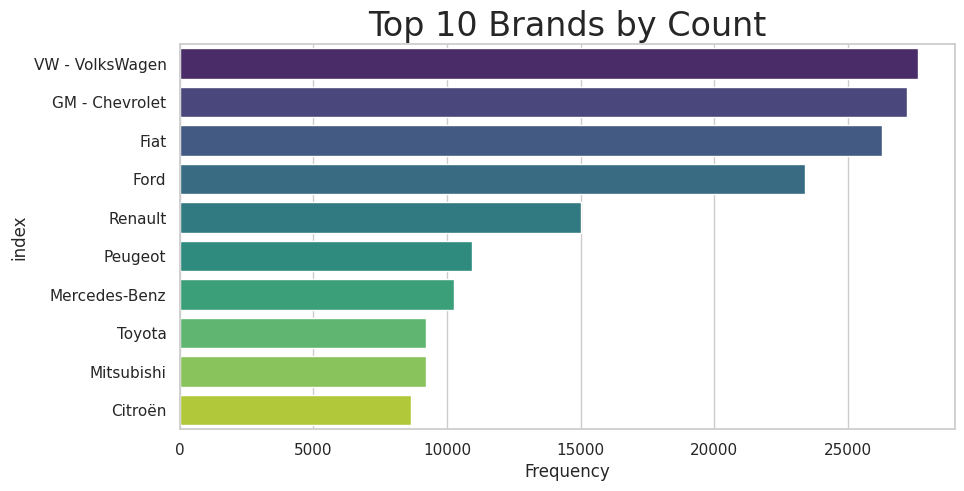

In [95]:
top_10_brands = df['brand'].value_counts().reset_index(name = 'count').sort_values(by ='count', ascending = False).head(10)

plt.figure(figsize = (10, 5))
sns.barplot(y = top_10_brands['index'], x = top_10_brands['count'], palette = 'viridis')
plt.title("Top 10 Brands by Count", fontsize = 24)
plt.xlabel("Frequency")
plt.show()

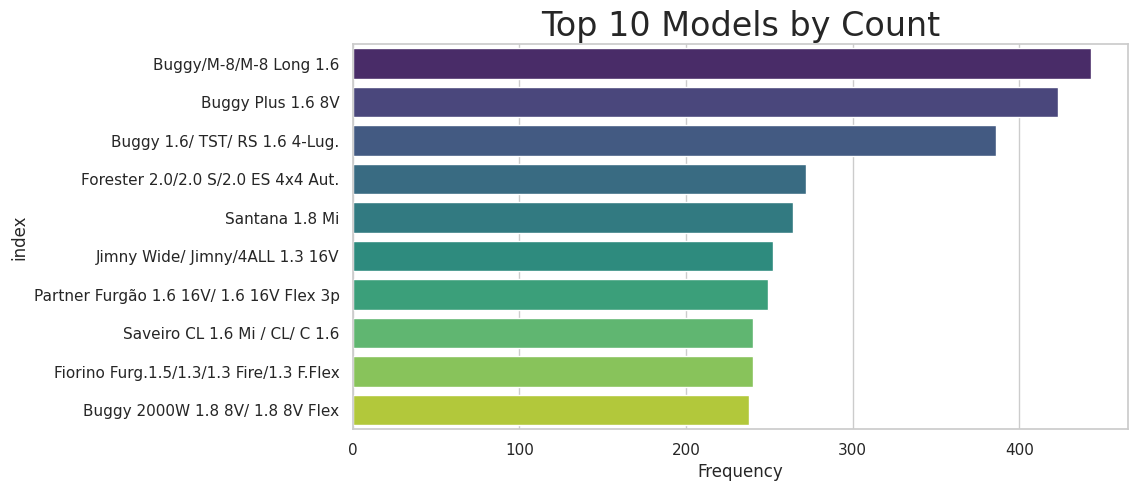

In [96]:
top_10_brands = df['model'].value_counts().reset_index( name= 'count').sort_values(by ='count', ascending = False).head(10)

plt.figure(figsize = (10, 5))
sns.barplot(y = top_10_brands['index'], x = top_10_brands['count'], palette = 'viridis')
plt.title("Top 10 Models by Count", fontsize = 24)
plt.xlabel("Frequency")
plt.show()

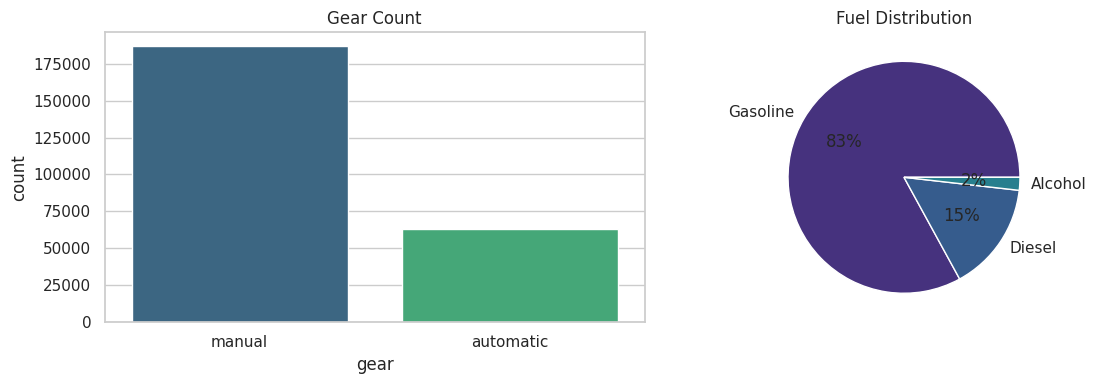

In [97]:
fuel_dist = df['fuel'].value_counts().reset_index(name = 'count')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Subplot 1: Countplot for 'gear'
sns.countplot(data=df, x='gear', palette='viridis', ax=axes[0])
axes[0].set_title("Gear Count")

# Subplot 2: Pie chart for 'fuel'
fuel_dist = df['fuel'].value_counts().reset_index()
colors = sns.color_palette('viridis')
axes[1].pie(fuel_dist['fuel'], labels=fuel_dist['index'], colors=colors, autopct='%.0f%%')
axes[1].set_title("Fuel Distribution")


plt.tight_layout()
plt.show()

In [98]:
def categorical_correlation(df, columns):
    for col in columns:
        plt.figure(figsize = (15, 5))
        sns.barplot(x = df[col], y = df['avg_price_brl'], palette = 'viridis')
        plt.title(f'Correlation between avg_price and {col}')
        plt.show()

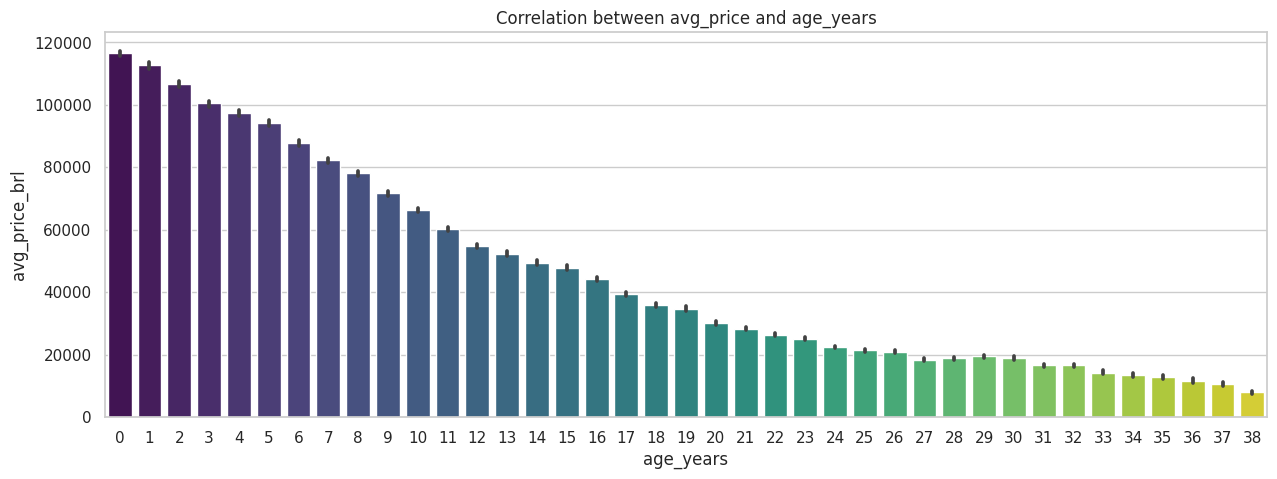

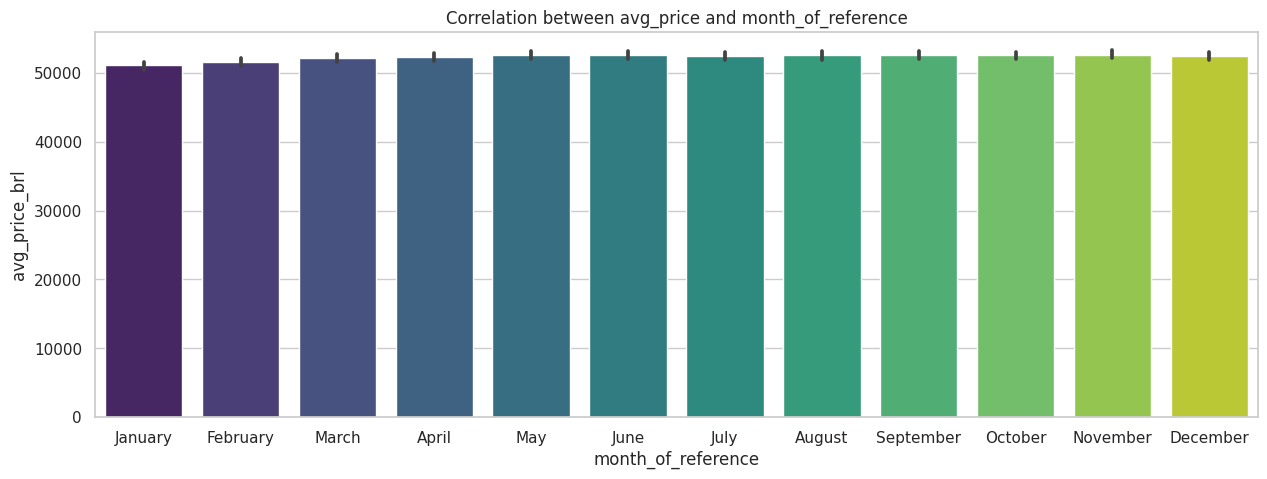

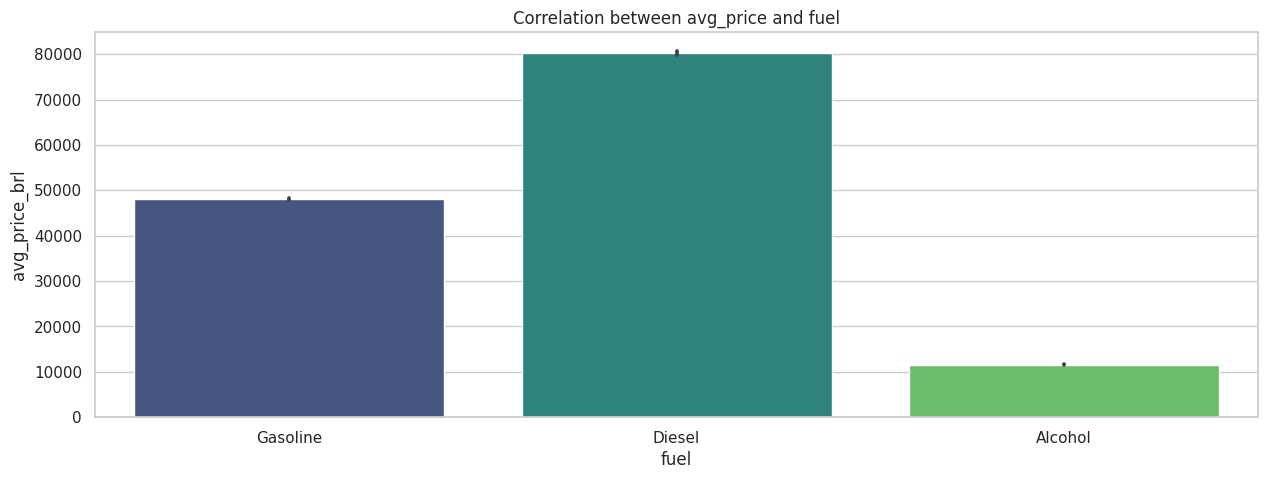

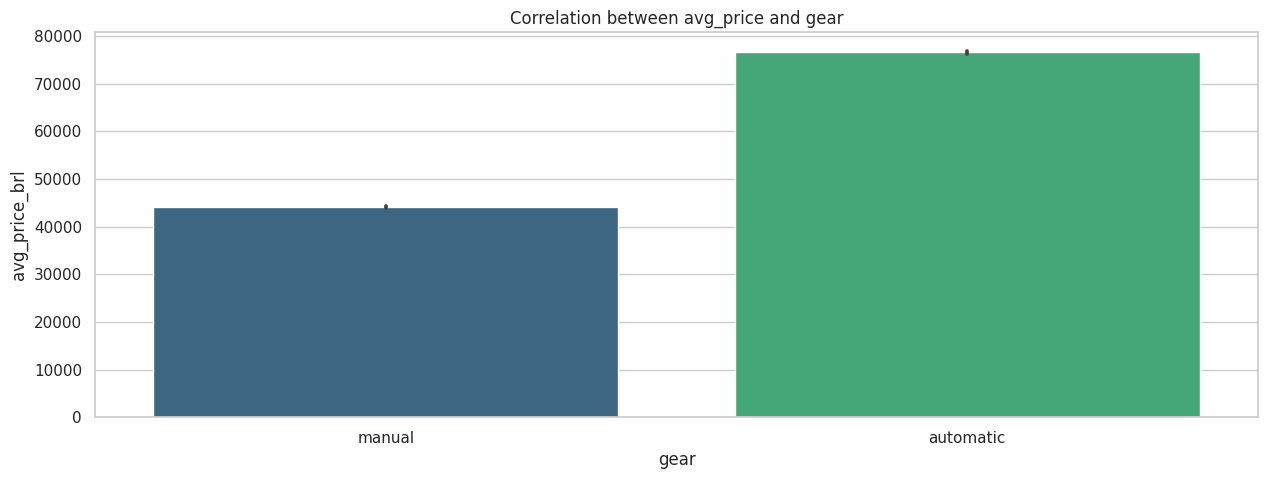

In [99]:
cat_cols = ['age_years', 'month_of_reference', 'fuel', 'gear']
categorical_correlation(df, cat_cols)

<ipython-input-158-0e8f281614f2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap=custom_palette)


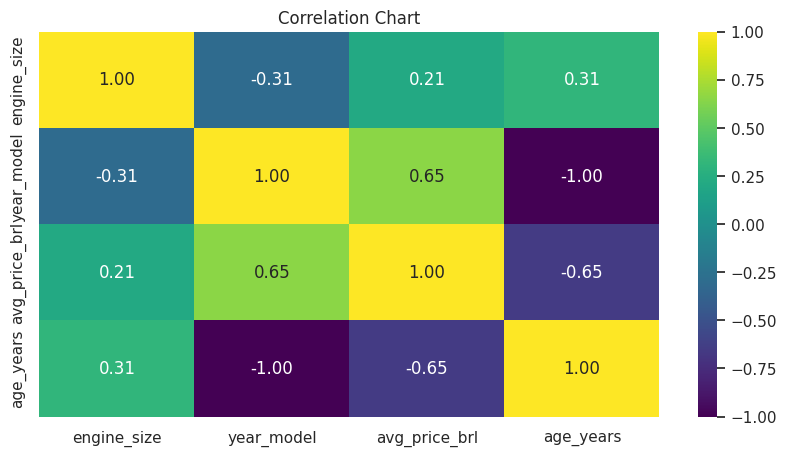

In [158]:
# Create a custom color palette
custom_palette = sns.color_palette("viridis", as_cmap=True)
plt.figure(figsize=(10, 5))
# Using the custom color palette for the heatmap
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap=custom_palette)

plt.title('Correlation Chart')
plt.show()

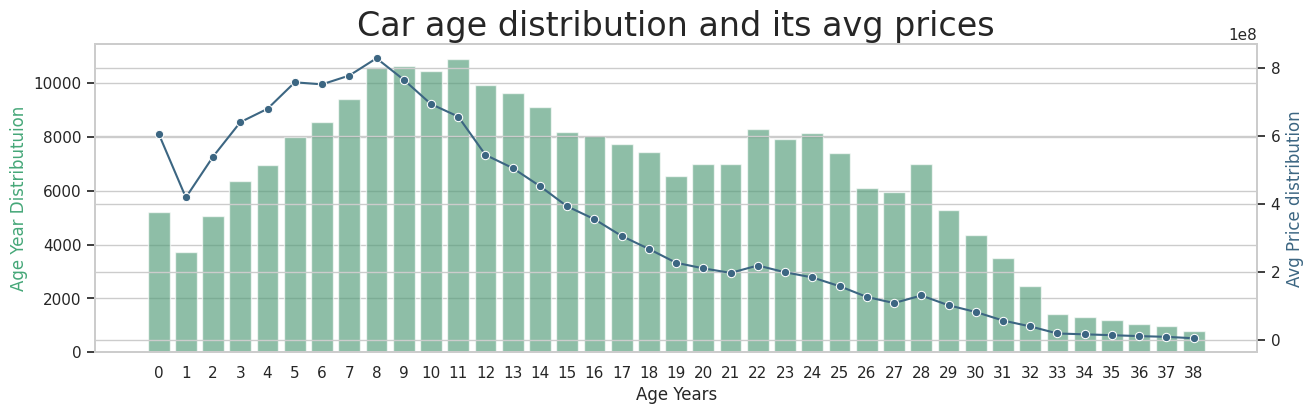

In [164]:
# Sample data
# Create a bar plot
count_age = df.groupby('age_years').agg({"age_years":'count', 'avg_price_brl': 'sum'})
plt.figure(figsize = (15, 4))
ax = sns.barplot(x=count_age.index, y=count_age['age_years'], color='#45A778', alpha = 0.65)

# Create a line plot on the same axes
ax2 = ax.twinx()
sns.lineplot(x= count_age.index, y=count_age['avg_price_brl'], color='#3C6682', marker = 'o' , ax=ax2)

# Customize the plot
ax.set_ylabel('Age Year Distributuion', color='#45A778')
ax2.set_ylabel('Avg Price distribution', color='#3C6682')
ax.set_xlabel('Age Years')
plt.title('Car age distribution and its avg prices', fontsize = 24)

# Show the plot
plt.show()


# **Key Points from the Sample Dataset:**

- The price of a car exhibits a negative correlation with its age; as the age of the car increases, its price tends to decrease.

- Automatic cars tend to incur higher costs.

- "Cars equipped with alcohol-based fuel systems are typically significantly more affordable.

- The price exhibits a negative correlation with the car age.

- The year model exhibits a posiive correlation with the car's price.

---